In [1]:
%load_ext autoreload
%autoreload 2
import sys
import numpy as np
sys.path=["/astro/u/anze/work/BMX/bmxdaq/py"]+sys.path
import bmxdata as bmx
print bmx.__file__
import matplotlib.pyplot as plt
datadir="/gpfs01/astro/workarea/bmxdata/"
%aimport -matplotlib -os -np
%matplotlib inline

/astro/u/anze/work/BMX/bmxdaq/py/bmxdata.pyc


In [2]:
da=bmx.BMXFile(datadir+"170719_first/flight_rfi_20_4_170719_0300.data",force_version=1.5)
da2=bmx.BMXFile(datadir+"170823/170823_0300.data")

('We have ', 1, 'cuts:')
('    Cut ', 0, ' ', 8.1956387e-06, '-', 550.0, 'MHz #P=', 4096)
Loading done, 29505 samples
('We have ', 1, 'cuts:')
('    Cut ', 0, ' ', 8.1956387e-06, '-', 550.0, 'MHz #P=', 4096)
Loading done, 29504 samples


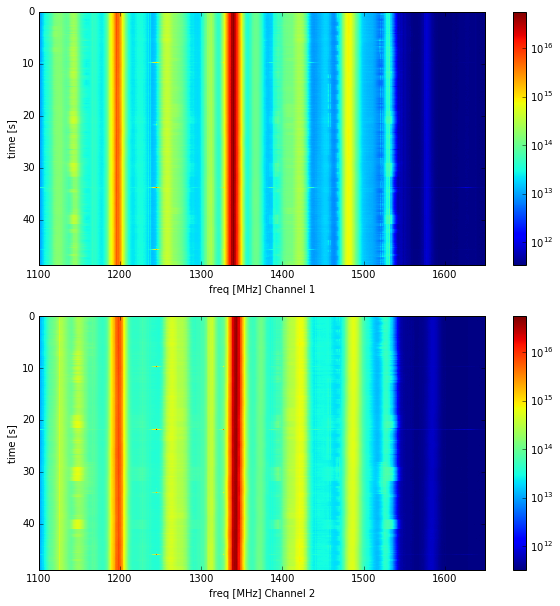

In [3]:

plt.figure(figsize=(10,10))
da.plotWaterfall(nsamples=400)


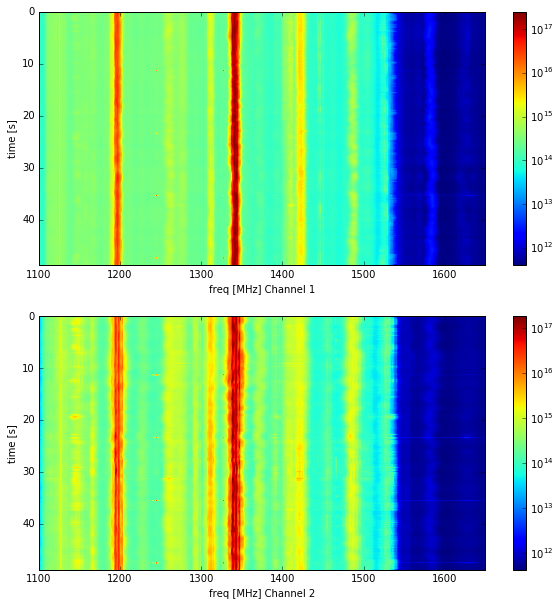

In [4]:

plt.figure(figsize=(10,10))
da2.plotWaterfall(nsamples=400)

In [5]:
da.getRadar(); da2.getRadar()

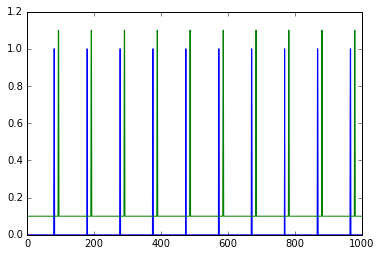

In [6]:
plt.plot(da.radarOn[:1000])
plt.plot(da2.radarOn[:1000]+0.1)

In [7]:
da2.haveMJD

True

In [8]:
da2.data['mjd']

array([ 57988.29166667,  57988.29166667,  57988.29166667, ...,
        57988.33332176,  57988.33332176,  57988.33332176])

da2.data.shape

In [9]:
import astropy.units as u
from scipy.interpolate import interp1d
from astropy.coordinates import EarthLocation, AltAz,SkyCoord
from astropy.time import Time
telescope_loc=EarthLocation(lat=40.87792*u.deg, lon=-72.85852*u.deg, height=0*u.m)
time=Time(np.linspace(57987,57988,100),format='mjd')
point=AltAz(alt=90*u.deg, az=0*u.deg,location=telescope_loc,obstime=time)
#sky=point.transform_to(SkyCoord(ra=0*u.deg, dec=0*u.deg,frame='icrs'))
skyi=point.transform_to(SkyCoord(0*u.deg,0*u.deg,frame='galactic'))


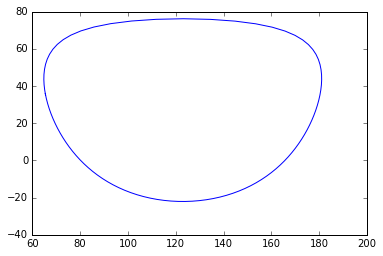

In [10]:
#galactic plan roll
plt.plot(skyi.l.degree, skyi.b.degree)